In [1]:
# Intro to Machine Learning
# Homework 2
# Michael Campo ID: 801147955

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data1 = pd.read_csv('diabetes.csv')
data1.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Problem 1

In [4]:
# Split data into Training and Test set
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data1, train_size = 0.80, test_size = 0.20, random_state = 0)

Y_train = df_train.iloc[:,8].values
Y_test = df_test.iloc[:,8].values
Y_train.shape

(614,)

In [5]:
#Feature scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train = sc.fit_transform(df_train)
test = sc.fit_transform(df_test)
test[1]

array([-0.56553774, -0.42589245,  0.2898275 ,  0.6313163 ,  0.28030801,
        0.31944116, -0.27698825, -0.83598035, -0.66276115])

In [6]:
# Split data into features and outcome

trainData = np.asarray(train[:, 0:8])
testData = np.asarray(test[:, 0:8])
trainData.shape

(614, 8)

In [7]:
# Import Logistic Regression Function
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(trainData, Y_train)

LogisticRegression()

In [8]:
Y_pred = classifier.predict(testData)
Y_pred[0:9]

array([1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [43]:
# Display the data in a Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

cnf_matrix = confusion_matrix(Y_test, Y_pred)
ac = accuracy_score(Y_test, Y_pred)
cnf_matrix
ac

array([[94, 13],
       [18, 29]], dtype=int64)

0.7987012987012987

In [44]:
# Evalutate the model using evaluation metrics
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.7987012987012987
Precision: 0.6904761904761905
Recall: 0.6170212765957447


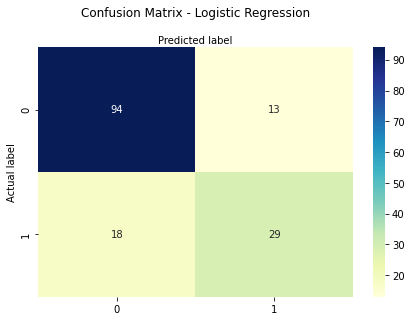

In [45]:
# Visualize the results of the model in the form of a heat map confusion matrix
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names));
plt.xticks(tick_marks, class_names);
plt.yticks(tick_marks, class_names);

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top");
plt.tight_layout();
plt.title('Confusion Matrix - Logistic Regression', y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Problem 2

In [46]:
# Naive Gaussian Bayes
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(trainData, Y_train)

GaussianNB()

In [47]:
Y2_pred = classifier_NB.predict(testData)

In [48]:
# Naive Bayes Confusion Matrix

cnf_matrixNB = confusion_matrix(Y_test, Y2_pred)
acNB = accuracy_score(Y_test,  Y2_pred)
cnf_matrixNB
acNB

array([[87, 20],
       [16, 31]], dtype=int64)

0.7662337662337663

In [49]:
# Evalutate the NB model using evaluation metrics
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, Y2_pred))
print("Precision:", metrics.precision_score(Y_test, Y2_pred))
print("Recall:", metrics.recall_score(Y_test, Y2_pred))

Accuracy: 0.7662337662337663
Precision: 0.6078431372549019
Recall: 0.6595744680851063


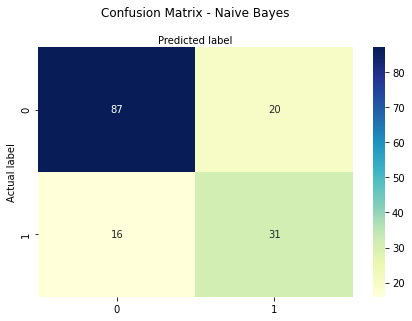

In [50]:
# Visualize the results of the model in the form of a heat map confusion matrix
import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixNB), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Naive Bayes', y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Problem 3

In [51]:
# K-fold Cross validation
from sklearn.model_selection import KFold
kf_5 = KFold(n_splits=5)
kf_10 = KFold(n_splits=10)

x = data1.iloc[:,0:8].values
Y = data1.iloc[:,8].values
X = sc.fit_transform(x)

def get_score(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

#for train_index, test_index in kf_5.split(X):
 #   print("TRAIN:", train_index, "\n", "TEST:", test_index)
  #  X_train, X_test = X[train_index], X[test_index]
   # Y_train, Y_test = Y[train_index], Y[test_index]

In [73]:
# K-fold training
from numpy import mean
from numpy import std
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

res1 = cross_validate(LogisticRegression(), X, Y, scoring=scoring, cv=kf_5)
res2 = cross_validate(LogisticRegression(), X, Y, scoring=scoring, cv=kf_10)

print("K-Fold 5 Splits")
print('Accuracy: %.4f , Recall: %.4f , Precision: %.4f' %(np.mean(res1['test_accuracy']), np.mean(res1['test_recall']), np.mean(res1['test_precision'])))

print("\nK-Fold 10 Splits")
print('Accuracy: %.4f , Recall: %.4f , Precision: %.4f' %(np.mean(res2['test_accuracy']), np.mean(res2['test_recall']), np.mean(res2['test_precision'])))

K-Fold 5 Splits
Accuracy: 0.7722 , Recall: 0.5754 , Precision: 0.7177

K-Fold 10 Splits
Accuracy: 0.7800 , Recall: 0.5851 , Precision: 0.7325


# Problem 4

In [74]:
# K-fold CV using Naive Bayes

resNB1 = cross_validate(GaussianNB(), X, Y, scoring = scoring, cv=kf_5)
resNB2 = cross_validate(GaussianNB(), X, Y, scoring = scoring, cv=kf_10)

print("K-Fold 5 Splits")
print('Accuracy: %.4f , Recall: %.4f , Precision: %.4f' %(np.mean(resNB1['test_accuracy']), np.mean(resNB1['test_recall']), np.mean(resNB1['test_precision'])))

print("\nK-Fold 10 Splits")
print('Accuracy: %.4f , Recall: %.4f , Precision: %.4f' %(np.mean(resNB2['test_accuracy']), np.mean(resNB2['test_recall']), np.mean(resNB2['test_precision'])))

K-Fold 5 Splits
Accuracy: 0.7527 , Recall: 0.6015 , Precision: 0.6618

K-Fold 10 Splits
Accuracy: 0.7552 , Recall: 0.6010 , Precision: 0.6646
